In [ ]:
##Ir hasta mi usuario###
cd .. 
##Activar el virtual environment##
. juanpablosokil/deep_learning/bin/activate

##voy a mi carpeta##
cd juanpablosokil/deep_learning

##Accedo a la notebook de notebook
jupyter notebook


In [197]:
import tensorflow as tf
import keras
import numpy as np
import numpy as np
print(tf.__version__)


1.13.1


In [198]:
###Generador de Imagenes###
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)


In [199]:
###debo cargar una carpeta entera###
train_generator = train_datagen.flow_from_directory(
        '/mnt/c/source/deep_learning/images/train/',
        batch_size=1,
        target_size=(100, 100),
        color_mode = 'rgb',    
    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(
        '/mnt/c/source/deep_learning/images/test/',
        batch_size=1,
        target_size=(100, 100),
        color_mode = 'rgb',    
    class_mode = 'binary')


Found 22 images belonging to 2 classes.
Found 5 images belonging to 2 classes.


In [200]:
from keras import models
from keras import layers


#The process of building a Convolutional Neural Network always involves four major steps.
#Step - 1 : Convolution
#Step - 2 : Pooling
#Step - 3 : Flattening
#Step - 4 : Full connection

model = models.Sequential()
###El input shape es la cantidad pixels, el 3 sirve cuando es RGB###
#### 32 es la cantidad de neuronas###
####kernel_size 3x3 es lo más frecuente, se puede usar 5x5###
model.add(Conv2D(32, (3,3), input_shape = (100, 100, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 76832)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 76833     
_________________________________________________________________
activation_14 (Activation)   (None, 1)                 0         
Total params: 77,729
Trainable params: 77,729
Non-trainable params: 0
_________________________________________________________________
None


In [202]:

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

H=model.fit_generator(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=50)


#https://mc.ai/tutorial-image-classification-with-keras-flow_from_directory-and-generators/

Epoch 1/50
22/22 [==============================] - 0s 11ms/step - loss: 0.5700 - acc: 0.7273 - val_loss: 0.1461 - val_acc: 1.0000
Epoch 2/50
22/22 [==============================] - 0s 9ms/step - loss: 0.3318 - acc: 0.8636 - val_loss: 0.0996 - val_acc: 1.0000
Epoch 3/50
22/22 [==============================] - 0s 10ms/step - loss: 0.2828 - acc: 0.8636 - val_loss: 0.0124 - val_acc: 1.0000
Epoch 4/50
22/22 [==============================] - 0s 9ms/step - loss: 0.4096 - acc: 0.8182 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 5/50
22/22 [==============================] - 0s 11ms/step - loss: 0.6189 - acc: 0.8182 - val_loss: 0.0691 - val_acc: 1.0000
Epoch 6/50
22/22 [==============================] - 0s 8ms/step - loss: 0.4580 - acc: 0.7273 - val_loss: 0.0629 - val_acc: 1.0000
Epoch 7/50
22/22 [==============================] - 0s 9ms/step - loss: 0.2666 - acc: 0.8182 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 8/50
22/22 [==============================] - 0s 11ms/step - loss: 0.5028 - acc: 

In [203]:
scores_generator = model.evaluate_generator(test_generator, steps=5)
scores_generator

[0.0009324319879851828, 1.0]

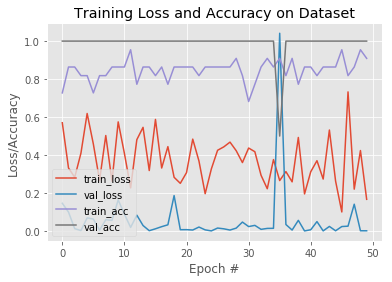

In [204]:

# plot the training loss and accuracy
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

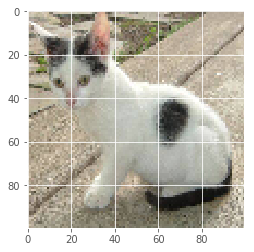

In [205]:
from keras.preprocessing import image
test_image = image.load_img('/mnt/c/source/deep_learning/images/prueba1.jpg', target_size = (100, 100))
numpy_image = img_to_array(test_image)
plt.imshow(np.uint8(numpy_image))
plt.show()

In [206]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

array([[0.]], dtype=float32)

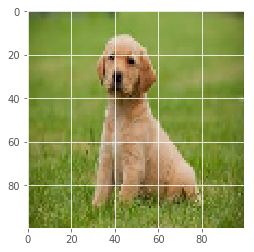

In [207]:
test_image = image.load_img('/mnt/c/source/deep_learning/images/prueba2.jpg', target_size = (100, 100))
numpy_image = img_to_array(test_image)
plt.imshow(np.uint8(numpy_image))
plt.show()

In [208]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

array([[1.]], dtype=float32)